# Data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
# helps to plot graphs in line with code-cells 
import seaborn as sns

### Importing the data


In [2]:
Poder_de_compra_per_capita_url = 'https://raw.githubusercontent.com/Hardi-Lior/WDL/main/Stage_1/data/Poder_de_compra_per_capita.csv'
Poder_de_compra_per_capita_df = pd.read_csv(Poder_de_compra_per_capita_url)

County_Coordinates_Data_url = 'https://raw.githubusercontent.com/Hardi-Lior/WDL/main/Stage_1/data/County_Coordinates_Data.csv'
County_Coordinates_Data_df = pd.read_csv(County_Coordinates_Data_url)



#Formating data 

In [3]:
Poder_de_compra_per_capita_df['Territórios'] = Poder_de_compra_per_capita_df['Territórios'].str.lower()

In [4]:
County_Coordinates_Data_df.head()

,address,location,point,latitude,longitude,altitude,County
0,"amadora,lisboa,Portugal","Amadora, Lisboa, Grande Lisboa, Área Metropoli...","(38.7595162, -9.223677009460125, 0.0)",38.759516,-9.223677,0.0,amadora
1,"cascais,lisboa,Portugal","Cascais, Lisboa, Grande Lisboa, Área Metropoli...","(38.72240025, -9.396909171649877, 0.0)",38.722400,-9.396909,0.0,cascais
2,"lisboa,lisboa,Portugal","Lisboa, Grande Lisboa, Área Metropolitana de L...","(38.7077507, -9.1365919, 0.0)",38.707751,-9.136592,0.0,lisboa
3,"loures,lisboa,Portugal","Loures, Lisboa, Grande Lisboa, Área Metropolit...","(38.8578642, -9.175816056948255, 0.0)",38.857864,-9.175816,0.0,loures
4,"mafra,lisboa,Portugal","Mafra, Lisboa, Grande Lisboa, Área Metropolita...","(38.9369782, -9.3282374, 0.0)",38.936978,-9.328237,0.0,mafra


In [5]:
# removing excess collum
Poder_de_compra_per_capita_df = Poder_de_compra_per_capita_df[Poder_de_compra_per_capita_df.set_index('Territórios').index.isin(County_Coordinates_Data_df.set_index('County').index)]


In [6]:
Poder_de_compra_per_capita_df=Poder_de_compra_per_capita_df.reset_index()
Poder_de_compra_per_capita_df.columns
Poder_de_compra_per_capita_df['year_2017']= Poder_de_compra_per_capita_df['2017']
Poder_de_compra_per_capita_df.head()

,index,Territórios,1993,2000,2002,2007,2009,2011,2013,2015,2017,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,year_2017
0,32,espinho,112.9,101.1,116.5,110.5,105.1,99.7,102,104.6,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103
1,33,gondomar,84.4,80.6,92.6,83.8,81.7,80.4,82.8,84,84.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.1
2,34,maia,109,115.7,118.2,115.2,119.1,112.3,111.1,113.2,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.7
3,35,matosinhos,132.2,123.2,133.9,127.9,130.6,124.4,121,123.7,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123
4,36,oliveira de azeméis,64.8,75.6,74.4,75,74,80.6,84.5,83.4,83.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.1


In [7]:
# Select the colums we want  ones you want
Poder_de_compra_per_capita_df = Poder_de_compra_per_capita_df[['Territórios','year_2017']]
Poder_de_compra_per_capita_df.head()

,Territórios,year_2017
0,espinho,103
1,gondomar,84.1
2,maia,110.7
3,matosinhos,123
4,oliveira de azeméis,83.1


In [8]:
# No missing data -> Fantastic
Poder_de_compra_per_capita_df.isna().sum()

Territórios    0
year_2017      0
dtype: int64

In [9]:
Poder_de_compra_per_capita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Territórios  32 non-null     object
 1   year_2017    32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


we can see that there are 33 rows ie 33 counties in the data set, but we are missing some counties

In [10]:
Poder_de_compra_per_capita_set = set(Poder_de_compra_per_capita_df['Territórios'])
County_Coordinates_Data_set = set(County_Coordinates_Data_df['County'])
difference_set = County_Coordinates_Data_set - Poder_de_compra_per_capita_set
print(difference_set)

{'vila franca de xira', 'seixal'}


the new data doesn't have the data on **seixal and vila franca de xira** 

In [11]:
Poder_de_compra_per_capita_df['year_2017'] = Poder_de_compra_per_capita_df['year_2017'].astype(float)
Poder_de_compra_per_capita_df['log10_year_2017'] = np.log10(Poder_de_compra_per_capita_df['year_2017'])

In [12]:
Poder_de_compra_per_capita_df.replace({'log10_year_2017': r'x'}, {'log10_year_2017': 'NAN'}, regex=True)

,Territórios,year_2017,log10_year_2017
0,espinho,103.0,2.012837
1,gondomar,84.1,1.924796
2,maia,110.7,2.044148
3,matosinhos,123.0,2.089905
4,oliveira de azeméis,83.1,1.919601
5,paredes,79.8,1.902003
6,porto,157.8,2.198107
7,póvoa de varzim,95.5,1.980003
8,santa maria da feira,84.8,1.928396
9,santo tirso,85.8,1.933487


In [13]:
Poder_de_compra_per_capita_df.head()

,Territórios,year_2017,log10_year_2017
0,espinho,103.0,2.012837
1,gondomar,84.1,1.924796
2,maia,110.7,2.044148
3,matosinhos,123.0,2.089905
4,oliveira de azeméis,83.1,1.919601


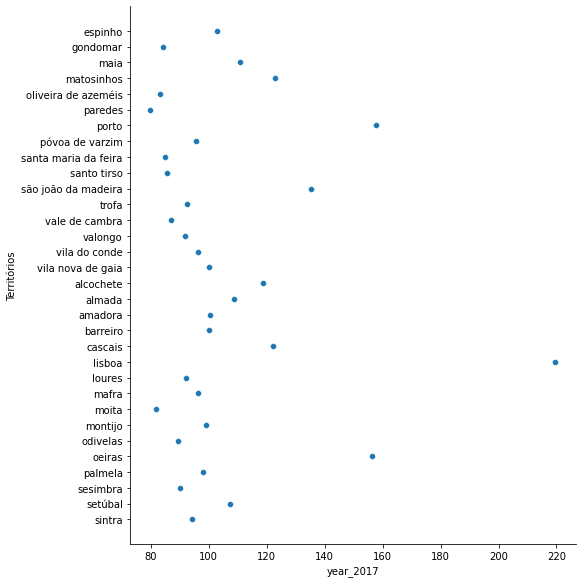

In [14]:
sns.relplot(
    y='Territórios',
    x='year_2017',
    # x='log1p_year_2017', 
    # hue='District_of_Origin', 
    # size='log1p_year_2017',
    # style='origin_region',
    sizes=(15,200),
    data=Poder_de_compra_per_capita_df,
    height=8
);

In [18]:
# Select the colums we want  ones you want
Poder_de_compra_per_capita_df = Poder_de_compra_per_capita_df[['Territórios','year_2017']]
Poder_de_compra_per_capita_df.head()

,Territórios,year_2017
0,espinho,103.0
1,gondomar,84.1
2,maia,110.7
3,matosinhos,123.0
4,oliveira de azeméis,83.1


In [15]:
## need to mount google drive to access the data
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [16]:
cd '/content/grive/MyDrive/WDL/Stage_1/data'

/content/grive/MyDrive/WDL/Stage_1/data


In [20]:
Poder_de_compra_per_capita_df.to_csv(r'Purchasing_Power_Per_Capita_Data.csv', index = False, header=True)